# CCT College

###### Module Title(s):	
Machine Learning for AI
###### Lecturer Name(s):	
David McQuaid
###### Assessment Title:	
ML_CA2
###### Student Name: 
Tamiris Rodrigues Duarte
###### Student Number:
2020294
###### Due Date (Deadline):	
31st May 2024

###### GitHub:	
https://github.com/tamirisrd/ML_CA2

### Neural Networks


The first step for the analysis was processing data stored in the file "BankRecords.csv," obtained from Moodle. Initially, the dataset was loaded into a DataFrame, and the data types of each column were examined using the info() function. This step showed that there were no missing values. Then, to prepare the data for modelling, I used two methods to encode the categorical columns. The "education" column was encoded using ordinal encoding, as it presents hierarchy. Other categorical columns were transformed using one-hot encoding, which converted categorical values into boolean indicators. These boolean indicators were then transformed into numerical values. After encoding and transforming the data, the original categorical columns were dropped to avoid conflicts in the prediction. 

After encoding, the dataset was split into features (X) and the target variable (Y), with "Income(Thousands)" designated as the target variable. The data was then converted into an array format for further processing. I applied the Standard Scaler and Min-Max Scaler for normalisation and tested to determine the most effective method. The Min-Max Scaler demonstrated better performance; thus, I followed the analysis with it. When dividing the data for the prediction analysis, the data was divided into training (70%), validation (15%), and testing (15%) sets in an attempt to prevent overfitting.

A Neural Network was created with a layered architecture consisting of layers with 12, 8, 4, and 1 neurons, respectively, to optimise the model's density. The model was compiled using "mean_squared_error" as the loss function, as it is a regression task. A plot comparing validation and training data based on the neural network loss value was generated, which illustrated an almost perfect fit between the training and validation datasets.

A linear regression model was also applied to the dataset to benchmark the neural network's performance. Both models were evaluated using Mean Squared Error (MSE) and R-squared (R2) metrics. Plots were generated to visualise and compare the performance of both models. The results indicated that the Linear Regression model had a slightly lower MSE than the Neural Network, suggesting better prediction accuracy. Nonetheless, the R2 value for the Linear Regression model was marginally higher, indicating that it explained a slightly more significant fraction of the variability in the target variable than the Neural Network did.

The use of Mean Squared Error (MSE) and R-squared (R2) metrics is crucial in evaluating model performance. MSE measures the average squared difference between the predicted and actual values, with lower MSE values indicating better model performance. R-squared (R2) measures the proportion of variance in the dependent variable that is predictable from the independent variables, with values ranging from 0 to 1. Higher R2 values, closer to 1, indicate better model performance.

In conclusion, the comparative analysis and visualisation showed that the Linear Regression model slightly outperformed the Neural Network model. Despite this, both models effectively captured the underlying patterns in the data, demonstrating their utility in predicting customer income.


### Semantic Analysis

To perform semantic analysis, I chose the "IMDB dataset", which comprises over 50,000 movie reviews, containing 49,582 reviews categorised into two sentiment classes: positive and negative. Initially, I assessed the dataset for missing values and confirmed that there were none. No further preprocessing was seemed necessary as the dataset appeared to be straightforward.

To facilitate machine learning processes, which typically handle numerical data more efficiently, I created a new column to match sentiment values with numbers, assigning "0" to positive sentiments and "1" to negative sentiments. Subsequently, I plotted these encoded sentiment values to examine the distribution of positive and negative reviews. The resulting plot indicated a balanced distribution between the two sentiment categories. To further validate these findings, I created an additional plot focusing solely on the sentiment labels, corroborating the initial observation of a balanced distribution.

Next, I used the TextBlob tool to perform sentiment analysis on the reviews and assigned new sentiment scores based on the analysis. This redefined the sentiment values, revealing a noticeable variation in the results. The plots show the proportion of positive sentiment reviews increased while the number of negative sentiment reviews decreased. Additionally, the analysis identified a small proportion of reviews as neutral, which was previously not represented in the original categorisation.

The difference occurs because TextBlob is a Python library that analyses text. This tool uses a rule-based approach that relies on a predefined set of categorised words that can be sourced from databases such as NLTK (Natural Language Toolkit). Doing a sentiment analysis with TextBlob is based on semantic relationships and the frequency of each word in a sentence, leading to more accurate sentiment classification. Therefore, the results may vary from the analysis before using TextBlob. 

# Neural Networks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
# Set the random seed for reproducibility
seed = 0
np.random.seed(seed)

In [4]:
# Read file
dataset = pd.read_csv("BankRecords.csv")
dataset

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,No,No,Yes,No
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,No,No,Yes,No
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,No,No,Yes,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [6]:
missing_value = dataset.isnull().sum()
print(missing_value)

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64


In [7]:
# Ordinal Encoding
en_education = ["High School", "Degree", "Diploma", "Masters", "PhD"]
dataset["Education_OriginalEncoded"] = dataset["Education"].apply(lambda x: en_education.index(x))

In [8]:
# Enconding
cat_col = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]
oh_en = pd.get_dummies(dataset[cat_col])
dataset = pd.concat([dataset, oh_en], axis=1)

In [9]:
dataset

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,...,Personal Loan_No,Personal Loan_Yes,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online Banking_No,Online Banking_Yes,CreditCard_No,CreditCard_Yes
0,1,25,1,49,91107,4,1.6,Diploma,0,No,...,True,False,False,True,True,False,True,False,True,False
1,2,45,19,34,90089,3,1.5,Diploma,0,No,...,True,False,False,True,True,False,True,False,True,False
2,3,39,15,11,94720,1,1.0,Diploma,0,No,...,True,False,True,False,True,False,True,False,True,False
3,4,35,9,100,94112,1,2.7,Degree,0,No,...,True,False,True,False,True,False,True,False,True,False
4,5,35,8,45,91330,4,1.0,Degree,0,No,...,True,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,...,True,False,True,False,True,False,False,True,True,False
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,...,True,False,True,False,True,False,False,True,True,False
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,...,True,False,True,False,True,False,True,False,True,False
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,...,True,False,True,False,True,False,False,True,True,False


In [10]:
# Drop columns after enconding to avoid redudancy
dataset.drop(columns= cat_col, inplace=True)
dataset.drop(columns="Education", inplace=True)

In [11]:
# Encoded column from Boolean to numerical value
encoded_col = [
    'Personal Loan_No', 'Personal Loan_Yes', 'Securities Account_No', 'Securities Account_Yes',
    'CD Account_No', 'CD Account_Yes', 'Online Banking_No', 'Online Banking_Yes',
    'CreditCard_No', 'CreditCard_Yes'
]

dataset[encoded_col] = dataset[encoded_col].astype(int)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5000 non-null   int64  
 1   Age                        5000 non-null   int64  
 2   Experience(Years)          5000 non-null   int64  
 3   Income(Thousands's)        5000 non-null   int64  
 4   Sort Code                  5000 non-null   int64  
 5   Family                     5000 non-null   int64  
 6   Credit Score               5000 non-null   float64
 7   Mortgage(Thousands's)      5000 non-null   int64  
 8   Education_OriginalEncoded  5000 non-null   int64  
 9   Personal Loan_No           5000 non-null   int32  
 10  Personal Loan_Yes          5000 non-null   int32  
 11  Securities Account_No      5000 non-null   int32  
 12  Securities Account_Yes     5000 non-null   int32  
 13  CD Account_No              5000 non-null   int32

In [13]:
# Array
df = dataset.values
df

array([[1.000e+00, 2.500e+01, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 4.500e+01, 1.900e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 3.900e+01, 1.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [4.998e+03, 6.300e+01, 3.900e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.999e+03, 6.500e+01, 4.000e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+03, 2.800e+01, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [14]:
# Split data
X = df[:,0:3]
y = df[:,3]

In [15]:
# Standard Scaler
scaler = StandardScaler()
standard_x = scaler.fit_transform(X)

standard_x

array([[-1.73170443, -1.77441684, -1.66607847],
       [-1.73101161, -0.02952359, -0.09633022],
       [-1.73031879, -0.55299157, -0.44516316],
       ...,
       [ 1.73031879,  1.54088033,  1.64783451],
       [ 1.73101161,  1.71536965,  1.73504275],
       [ 1.73170443, -1.51268285, -1.40445376]])

In [16]:
# MinMax Scaler
scaler_minmax = MinMaxScaler()
scaler_x = scaler_minmax.fit_transform(X)

scaler_x

array([[0.00000000e+00, 4.54545455e-02, 8.69565217e-02],
       [2.00040008e-04, 5.00000000e-01, 4.78260870e-01],
       [4.00080016e-04, 3.63636364e-01, 3.91304348e-01],
       ...,
       [9.99599920e-01, 9.09090909e-01, 9.13043478e-01],
       [9.99799960e-01, 9.54545455e-01, 9.34782609e-01],
       [1.00000000e+00, 1.13636364e-01, 1.52173913e-01]])

In [17]:
# Split data into training, validation, and test sets (70%, 15%, 15%)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(scaler_x, y, test_size=0.3)

In [18]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [19]:
print(f"Training data shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Validation data shape: X_val: {X_val.shape}, Y_val: {Y_val.shape}")
print(f"Test data shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training data shape: X_train: (3500, 3), Y_train: (3500,)
Validation data shape: X_val: (750, 3), Y_val: (750,)
Test data shape: X_test: (750, 3), Y_test: (750,)


In [20]:
# NN shape

model = Sequential()
model.add(Dense(12, input_shape=(3,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

C:\Users\tahro\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile model 

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 7782.7329 - val_accuracy: 0.0000e+00 - val_loss: 6970.7251
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 6755.4663 - val_accuracy: 0.0000e+00 - val_loss: 5022.5898
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 4428.8682 - val_accuracy: 0.0000e+00 - val_loss: 2275.7104
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2526.8274 - val_accuracy: 0.0000e+00 - val_loss: 2180.5186
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2423.6614 - val_accuracy: 0.0000e+00 - val_loss: 2164.7666
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2520.8638 - val_accuracy: 0.0000e+00 - val_loss: 2147.8740
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2335.5273 - val_accuracy: 0.0000e+00 - val_loss: 2135.1077

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2171.2122 - val_accuracy: 0.0000e+00 - val_loss: 2029.0425
Epoch 48/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2132.8633 - val_accuracy: 0.0000e+00 - val_loss: 2029.6979
Epoch 49/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2207.2644 - val_accuracy: 0.0000e+00 - val_loss: 2031.8120
Epoch 50/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2078.7737 - val_accuracy: 0.0000e+00 - val_loss: 2028.7131
Epoch 51/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2082.9150 - val_accuracy: 0.0000e+00 - val_loss: 2030.4011
Epoch 52/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2114.9233 - val_accuracy: 0.0000e+00 - val_loss: 2030.9907
Epoch 53/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2022.2638 - val_accuracy: 0.0000e+00 - val_loss: 2035.4955
Epoch

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2119.1077 - val_accuracy: 0.0000e+00 - val_loss: 2028.0825
Epoch 94/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2148.7561 - val_accuracy: 0.0000e+00 - val_loss: 2028.2930
Epoch 95/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2125.0283 - val_accuracy: 0.0000e+00 - val_loss: 2028.3472
Epoch 96/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2113.5408 - val_accuracy: 0.0000e+00 - val_loss: 2029.8812
Epoch 97/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2038.1575 - val_accuracy: 0.0000e+00 - val_loss: 2028.4812
Epoch 98/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 2091.7163 - val_accuracy: 0.0000e+00 - val_loss: 2029.3116
Epoch 99/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2198.2605 - val_accuracy: 0.0000e+00 - val_loss: 2029.8718
Epoch

In [23]:
# Evaluate the keras model
scores = model.evaluate(X_test,Y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 2185.3379 
compile_metrics: 0.00%


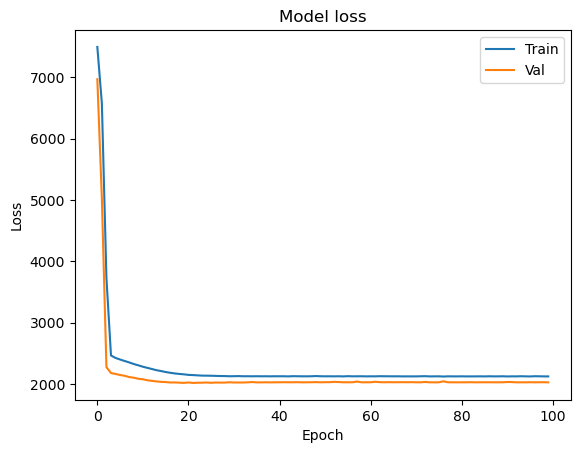

In [24]:
# Plotting the training and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [25]:
# NN predictions
predictions = model.predict(X_test)
print(predictions)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[68.82708 ]
 [77.05313 ]
 [72.567825]
 [74.388275]
 [76.262085]
 [79.83274 ]
 [68.53857 ]
 [74.80133 ]
 [72.890114]
 [69.42066 ]
 [77.736946]
 [69.19155 ]
 [68.772224]
 [69.033554]
 [70.83674 ]
 [74.831474]
 [69.47789 ]
 [68.970314]
 [76.000534]
 [78.06278 ]
 [68.82096 ]
 [75.48519 ]
 [69.02216 ]
 [75.82322 ]
 [72.0886  ]
 [67.40998 ]
 [80.151695]
 [71.3724  ]
 [69.59099 ]
 [69.123955]
 [71.211655]
 [70.385544]
 [77.87532 ]
 [77.66582 ]
 [69.24054 ]
 [74.764626]
 [72.95325 ]
 [70.830025]
 [70.078514]
 [77.75977 ]
 [73.18293 ]
 [70.93636 ]
 [69.29813 ]
 [73.43563 ]
 [74.336365]
 [75.84846 ]
 [68.44535 ]
 [71.64948 ]
 [79.360054]
 [70.144104]
 [77.39608 ]
 [70.478516]
 [74.321495]
 [76.63174 ]
 [75.263695]
 [79.054726]
 [69.05152 ]
 [76.57284 ]
 [68.18517 ]
 [78.10294 ]
 [70.29306 ]
 [68.66627 ]
 [76.46267 ]
 [76.886986]
 [69.35853 ]
 [72.8086  ]
 [69.0983  ]
 [74.74725 ]
 [76.149895]
 [69.42594 ]
 [77.37699 ]
 [68.969345]
 [74.963745]
 [68.59921 ]

In [26]:
# Mean Square Value and R2 value
nn_mse = mean_squared_error(Y_test, predictions)
nn_r2 = r2_score(Y_test, predictions)
print("Neural Network - MSE: %.2f, R2: %.2f" % (nn_mse, nn_r2))

Neural Network - MSE: 2134.00, R2: -0.00


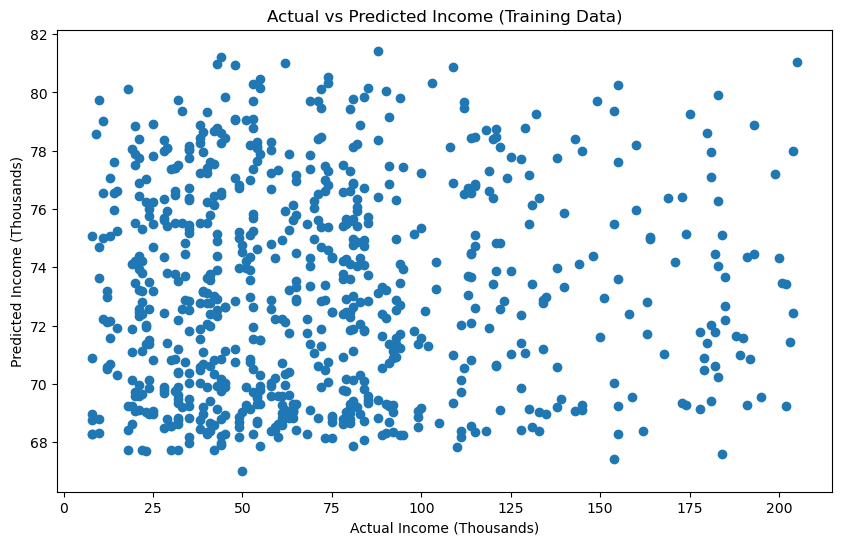

In [27]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Income (Thousands)')
plt.ylabel('Predicted Income (Thousands)')
plt.title('Actual vs Predicted Income (Training Data)')
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

## Linear Regression

In [29]:
model_lr = LinearRegression()

In [30]:
# Fit LR model
model_lr.fit(X_train,Y_train)

LinearRegression()

In [31]:
lr_predictions = model_lr.predict(X_test)
lr_mse = mean_squared_error(Y_test, lr_predictions)
lr_r2 = r2_score(Y_test, lr_predictions)

print("Linear Regression - MSE: %.2f, R2: %.2f" % (lr_mse, lr_r2))

Linear Regression - MSE: 2142.06, R2: -0.00


In [32]:
# Comparative Neural Network vs Linear Regression
print("Neural Network vs Linear Regression:")
print("MSE - NN: %.2f, LR: %.2f" % (nn_mse, lr_mse))
print("R2 - NN: %.2f, LR: %.2f" % (nn_r2, lr_r2))

Neural Network vs Linear Regression:
MSE - NN: 2134.00, LR: 2142.06
R2 - NN: -0.00, LR: -0.00


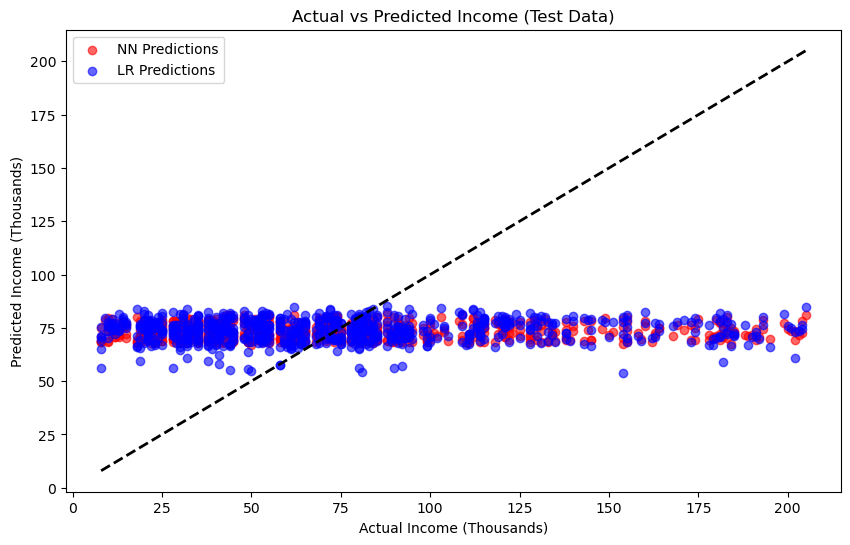

In [33]:
# Plotting Neural Network vs Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.6, color='r', label='NN Predictions')
plt.scatter(Y_test, lr_predictions, alpha=0.6, color='b', label='LR Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Income (Thousands)')
plt.ylabel('Predicted Income (Thousands)')
plt.title('Actual vs Predicted Income (Test Data)')
plt.legend()
plt.show()

## New Customer

In [34]:
# Define the new customer's data
new_customer = pd.DataFrame({
    "ID": [5001.0],
    "Age": [45],
    "Experience(Years)": [20],
    "Income(Thousands's)": [37],
    "Sort Code": [74634],
    "Family": [3],
    "Credit Score": [7.5],
    "Mortgage(Thousands's)": [5],
    "Education_OriginalEncoded": [2],
    "Personal Loan_No": [1],
    "Personal Loan_Yes": [0],
    "Securities Account_No": [0],
    "Securities Account_Yes": [1],
    "CD Account_No": [1],
    "CD Account_Yes": [0],
    "Online Banking_No": [0],
    "Online Banking_Yes": [1],
    "CreditCard_No": [1],
    "CreditCard_Yes": [0]
})

# Select the same features used for training
new_customer_features = new_customer[["Age", "Experience(Years)", "Sort Code"]]

In [35]:
# Standardise the new customer's data
new_customer_scaled = scaler.fit_transform(new_customer_features)

In [36]:
# Predict using NN and LR models
nn_prediction = model.predict(new_customer_scaled)
lr_prediction = model_lr.predict(new_customer_scaled)
print("NN Prediction:", nn_prediction)
print("LR Prediction:", lr_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
NN Prediction: [[82.042206]]
LR Prediction: [79.9056369]


# Semantic Analysis

In [37]:
# Read file
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [39]:
# Checking missing values
missing_value = df.isnull().sum()
print(missing_value)

review       0
sentiment    0
dtype: int64


In [40]:
# Add column enumerating sentiment
df["value"] = df["sentiment"].apply(lambda x: 0 if x == "positive" else(1 if x == "negative" else None))

df.head()

,review,sentiment,value
0,One of the other reviewers has mentioned that ...,positive,0
1,A wonderful little production. <br /><br />The...,positive,0
2,I thought this was a wonderful way to spend ti...,positive,0
3,Basically there's a family where a little boy ...,negative,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0


<Axes: xlabel='value', ylabel='count'>

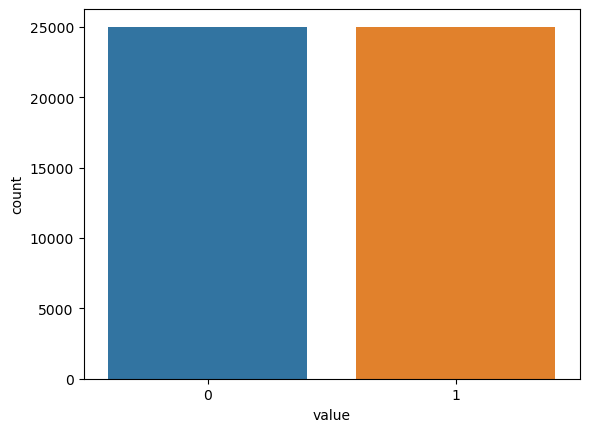

In [41]:
sns.countplot(x="value", data=df)

<Axes: xlabel='sentiment', ylabel='count'>

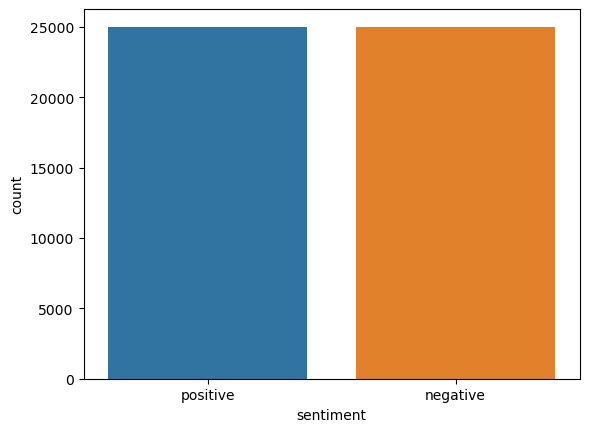

In [42]:
sns.countplot(x="sentiment", data=df)

In [43]:
from textblob import TextBlob

In [44]:
df["sentiment_score"]= df["review"].apply(lambda x:TextBlob(x).sentiment[0])

In [45]:
df["sentiment_score_textblob"] = df["sentiment_score"].apply(lambda x: "positive" if x > 0 else("neutral" if x == 0 else "negative"))

In [46]:
df

,review,sentiment,value,sentiment_score,sentiment_score_textblob
0,One of the other reviewers has mentioned that ...,positive,0,0.023433,positive
1,A wonderful little production. <br /><br />The...,positive,0,0.109722,positive
2,I thought this was a wonderful way to spend ti...,positive,0,0.354008,positive
3,Basically there's a family where a little boy ...,negative,1,-0.057813,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0,0.217952,positive
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,0,0.394425,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,1,-0.276190,negative
49997,I am a Catholic taught in parochial elementary...,negative,1,0.056984,positive
49998,I'm going to have to disagree with the previou...,negative,1,-0.048663,negative


<Axes: xlabel='sentiment_score_textblob', ylabel='count'>

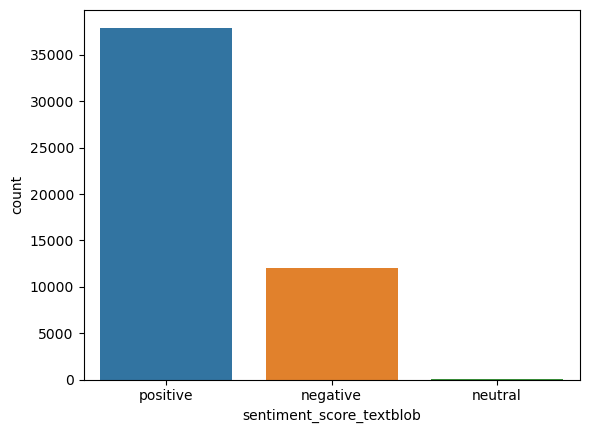

In [47]:
sns.countplot(x="sentiment_score_textblob", data=df)


# References
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Tutorial used in class 13/05

https://realpython.com/python-ai-neural-network/

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Tutorial used in class 29/04

https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

https://textblob.readthedocs.io/en/dev/

https://stackabuse.com/sentiment-analysis-in-python-with-textblob/